# TTest Visualization

---

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Ferreira, N., Fisher, D., & Konig, A. C. (2014, April). [Sample-oriented task-driven visualizations: allowing users to make better, more confident decisions.](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In Proceedings of the SIGCHI Conference on Human Factors in Computing Systems (pp. 571-580). ACM. ([video](https://www.youtube.com/watch?v=BI7GAs-va-Q))


In this [paper](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) the authors describe the challenges users face when trying to make judgements about probabilistic data generated through samples. As an example, they look at a bar chart of four years of data (replicated below in Figure 1). Each year has a y-axis value, which is derived from a sample of a larger dataset. For instance, the first value might be the number votes in a given district or riding for 1992, with the average being around 33,000. On top of this is plotted the 95% confidence interval for the mean (see the boxplot lectures for more information, and the yerr parameter of barcharts).



A challenge that users face is that, for a given y-axis value (e.g. 42,000), it is difficult to know which x-axis values are most likely to be representative, because the confidence levels overlap and their distributions are different (the lengths of the confidence interval bars are unequal). One of the solutions the authors propose for this problem (Figure 2c) is to allow users to indicate the y-axis value of interest (e.g. 42,000) and then draw a horizontal line and color bars based on this value. So bars might be colored red if they are definitely above this value (given the confidence interval), blue if they are definitely below this value, or white if they contain this value.



I will implement the bar coloring as described in the paper on random data drawn from different normal distribution, where the color of the bar is actually based on the amount of data covered (e.g. a gradient ranging from dark blue for the distribution being certainly below this y-axis, to white if the value is certainly contained, to dark red if the value is certainly not contained as the distribution is above the axis). The visual will show if the target mean value for the hypothesis test is within the 95% confidence interval


<IPython.core.display.Javascript object>


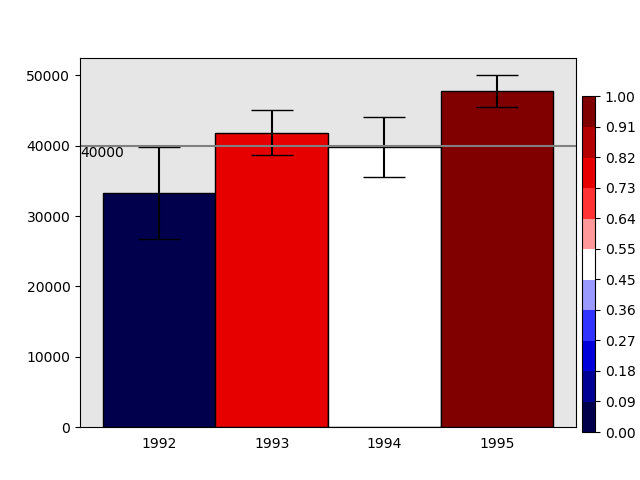

C:\Users\Landrover\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\Landrover\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as ss
%matplotlib notebook
import pandas as pd
import numpy as np
import pylab
import os

#Creating output image directory and file
output_dir = os.path.join("Images", "Comparison.png")
if not os.path.exists("Images"):
    os.mkdir("Images")

# Generating data for this visualization:
np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,130000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])
rows = list(range(3650))

df['Mean'] = df.apply(lambda x: np.mean(x[rows]) ,axis=1)
df['STD'] = df.apply(lambda x: np.std(x[rows]) ,axis=1)
#Constructing the 95% confidence interval
df['YERR'] = df.apply(lambda x: x['STD']*1.96/(3650**(1/2)), axis=1)

#Mean value for the Hypothesis to verify: mu0
val = 40000

df['ColorCode'] = df.apply(lambda x: (x['Mean']+x['YERR']-val)/(2*x['YERR']), axis=1)

mask = df['ColorCode'] > 1
df.loc[mask, 'ColorCode'] = 1

mask = df['ColorCode'] < 0
df.loc[mask, 'ColorCode'] = 0

df['Color']=''
df['edge']='k'

cmap = plt.cm.get_cmap('seismic', 11)    # 11 discrete colors
cmaplist = [cmap(i) for i in range(cmap.N)]

fig = plt.figure()

for i in df.index:

    if df.loc[i]['ColorCode']<1/11: df.at[i,'Color']=cmaplist[0]
    elif df.loc[i]['ColorCode']<2/11: df.at[i,'Color']=cmaplist[1]
    elif df.loc[i]['ColorCode']<3/11: df.at[i,'Color']=cmaplist[2]
    elif df.loc[i]['ColorCode']<4/11: df.at[i,'Color']=cmaplist[3]
    elif df.loc[i]['ColorCode']<5/11: df.at[i,'Color']=cmaplist[4]
    elif df.loc[i]['ColorCode']<6/11: df.at[i,'Color']=cmaplist[5]
    elif df.loc[i]['ColorCode']<7/11: df.at[i,'Color']=cmaplist[6]
    elif df.loc[i]['ColorCode']<8/11: df.at[i,'Color']=cmaplist[7]
    elif df.loc[i]['ColorCode']<9/11: df.at[i,'Color']=cmaplist[8]
    elif df.loc[i]['ColorCode']<10/11: df.at[i,'Color']=cmaplist[9]
    else: df.at[i,'Color']=cmaplist[10]
    
width = 1    

plt.bar(df.index, df['Mean'], width, color = df['Color'], edgecolor=df['edge'], yerr = df['YERR'],capsize=15)
plt.axhline(y=val, linestyle='-', color='gray')

ind = np.arange(len(df))
ax = plt.gca()

ax.set_xticks(df.index)
tick_labels_str = df.index.astype(str)
ax.set_xticklabels(tick_labels_str)
ax.set_facecolor('0.9')

plt.tick_params(axis='x', bottom='off', labelbottom='on')

ax1 = fig.add_subplot(111)
ax1.text(0, val, str(val), va='top', ha="left", transform=ax.get_yaxis_transform())

bounds = np.linspace(0,1,12)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

ax2 = fig.add_axes([0.91, 0.1, 0.02, 0.7])
cb = mpl.colorbar.ColorbarBase(ax2, cmap=cmap, norm=norm, spacing='proportional', ticks=bounds, boundaries=bounds, format='%.2f')

fig.savefig(output_dir)
